In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import collections 
import re

import warnings 
warnings.filterwarnings("ignore")

mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
df = pd.read_csv(r'Clean_QV_Data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [4]:
df_SalesbyLIFESTAGE = df[['LIFESTAGE','TOT_SALES']].groupby(['LIFESTAGE']).sum().reset_index()
# df_SalesbyLIFESTAGE = Date.merge(df_SalesbyDate, how='left',on='DATE') 
df_SalesbyLIFESTAGE 

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,353767.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


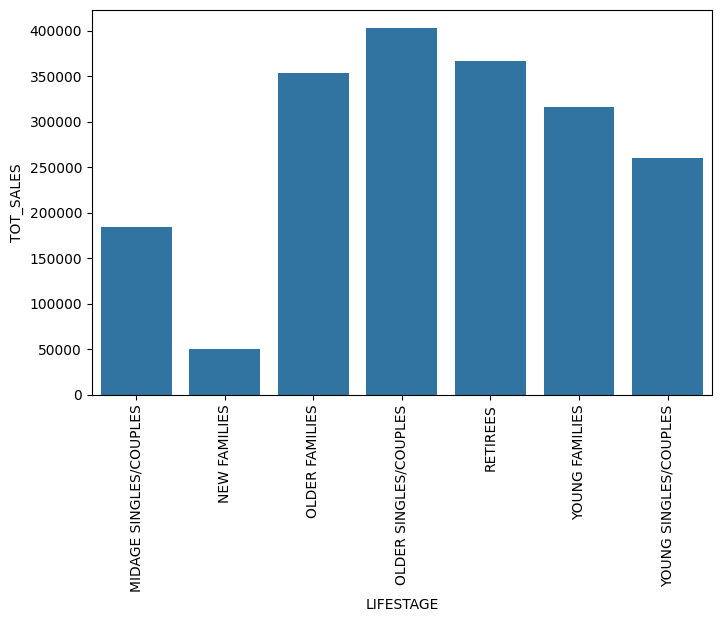

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data = df_SalesbyLIFESTAGE , x = 'LIFESTAGE', y = 'TOT_SALES')
plt.xticks(rotation = 90)
plt.show()

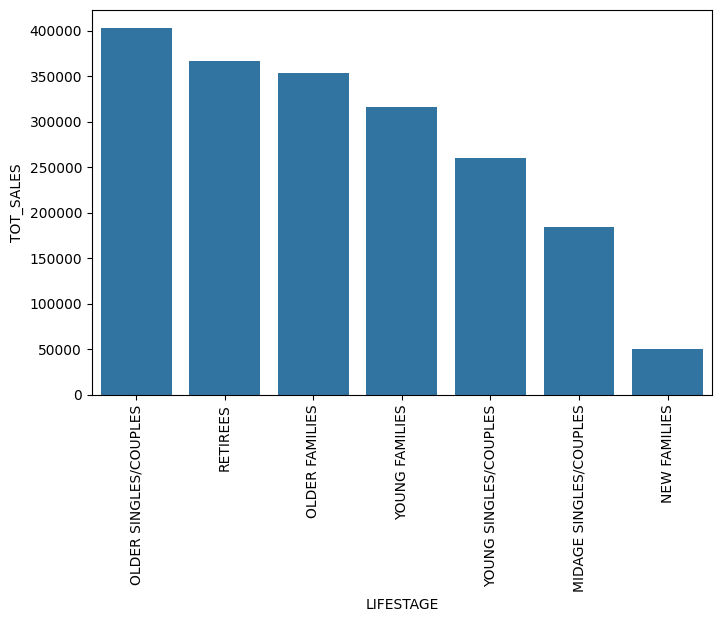

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data = xi , x = 'LIFESTAGE', y = 'TOT_SALES')
plt.xticks(rotation = 90)
plt.show()

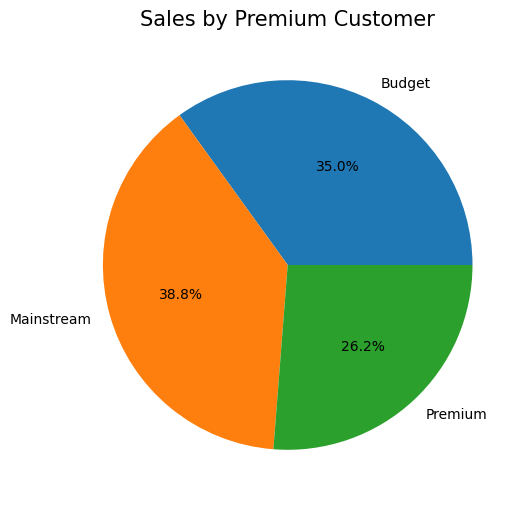

In [22]:
# Sales by Premium Customer
SalesbyPremCust = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
fig, ax = plt.subplots(figsize=(10,6))
plt.pie(SalesbyPremCust, autopct = '%0.1f%%', labels = SalesbyPremCust.index)
plt.title('Sales by Premium Customer', fontsize=15)
plt.show()

In [26]:
df_selection = df[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']]
df_selection_gb = df_selection.groupby(by=['LIFESTAGE', 'PREMIUM_CUSTOMER'],as_index=False).count()
df_selection_pivot = df_selection_gb.pivot(index='LIFESTAGE', columns = 'PREMIUM_CUSTOMER').rename({'TOT_SALES':''},axis = 1,inplace=False)
df_selection_pivot

PREMIUM_CUSTOMER       Budget Mainstream Premium
LIFESTAGE                                       
MIDAGE SINGLES/COUPLES   5020      11874    8216
NEW FAMILIES             3005       2325    1589
OLDER FAMILIES          23160      14244   11192
OLDER SINGLES/COUPLES   18407      18318   17754
RETIREES                15201      21466   13096
YOUNG FAMILIES          19122      12907   11563
YOUNG SINGLES/COUPLES    9242      20854    6281

In [27]:
df = df[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']]
df

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,YOUNG SINGLES/COUPLES,Premium,6.0
1,MIDAGE SINGLES/COUPLES,Budget,6.3
2,MIDAGE SINGLES/COUPLES,Budget,2.9
3,MIDAGE SINGLES/COUPLES,Budget,15.0
4,MIDAGE SINGLES/COUPLES,Budget,13.8
...,...,...,...
264831,YOUNG SINGLES/COUPLES,Premium,10.8
264832,YOUNG SINGLES/COUPLES,Premium,4.4
264833,YOUNG SINGLES/COUPLES,Premium,8.8
264834,YOUNG SINGLES/COUPLES,Premium,7.8


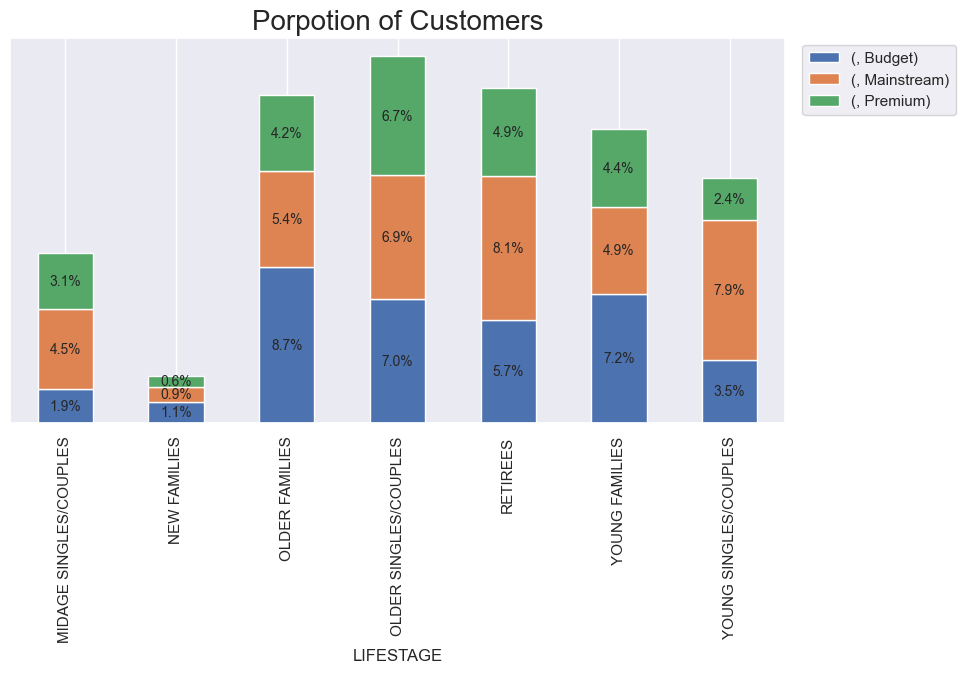

In [97]:
sns.set()
py = df_selection_pivot.plot(kind = 'bar', stacked=True, legend=False, figsize = (10,5))
py.legend(bbox_to_anchor=(1.23, 1)) 
py.set_yticks([])

# Setting the Legend
py.set_title('Porpotion of Customers', fontsize = 20)

# Creating the calculation for each bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = '{:.1%}'.format(height/df.shape[0])
    label_x = x + width / 2
    label_y = y + height / 2
    py.text (label_x, label_y, label_text, ha='center', va='center',  fontsize = 10)
    